## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To give multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


## Loading Dataset

In [2]:
ushape_df = pd.read_csv(r"C:\Task\demo_data\1.ushape.csv",header = None)

### Insights of Dataset

In [3]:
ushape_df.head()
ushape_df.shape
ushape_df.info()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


(100, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


### Plotting Scatterplot to visualize the input and output

In [4]:
# for HD visualizations
%config InlineBackend.figure_format='retina'

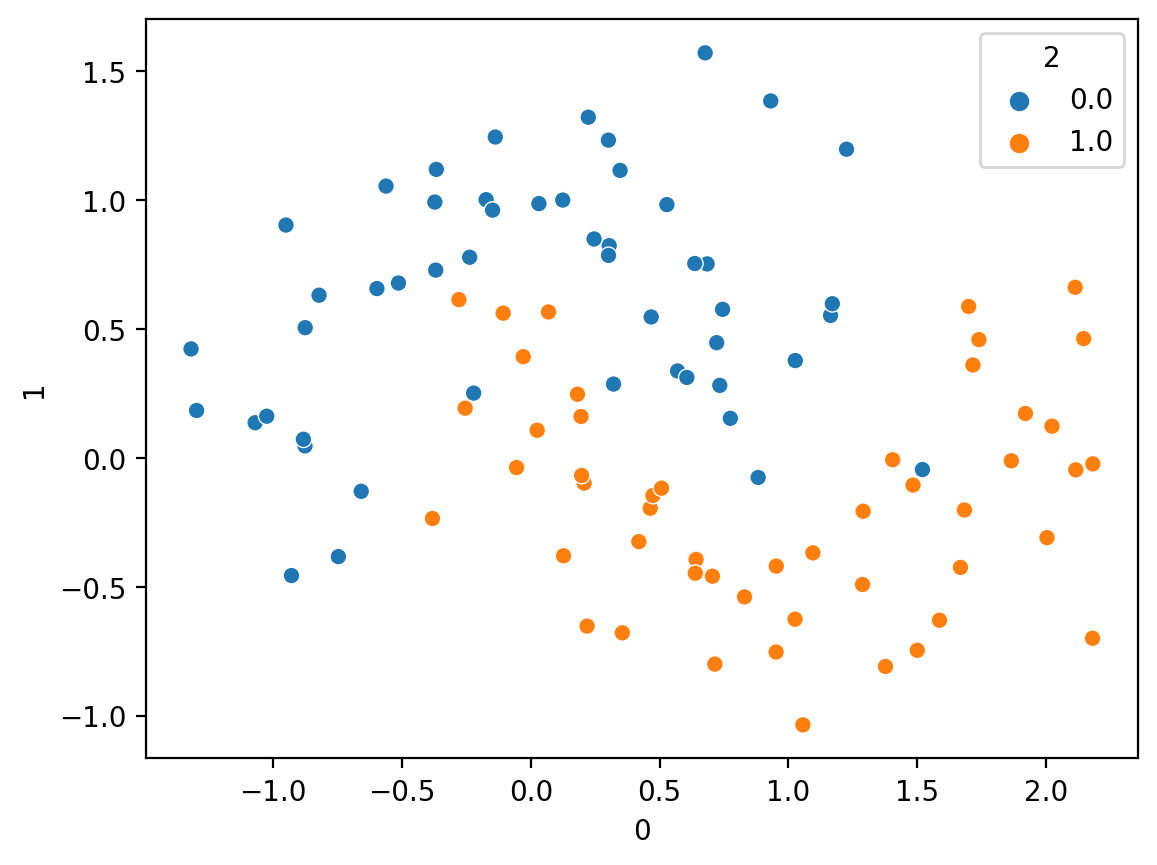

In [5]:

sns.scatterplot(x = ushape_df[0],y = ushape_df[1] ,hue = ushape_df[2],data = ushape_df);

### Train & test Split of the dataset

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(ushape_df[[0,1]], ushape_df[2], test_size = 0.2,random_state = 7)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# Performing standardization 
scaler = StandardScaler()
X_trainf = scaler.fit_transform(X_train)
X_testf = scaler.transform(X_test)

## Building Model 

## 1st Round

In [10]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [11]:
model = Sequential()
model.add(Dense(5,activation = 'relu',kernel_initializer = 'he_normal',input_dim = 2)) # No.of Neurons
model.add(Dropout(0.2))
model.add(Dense(3,activation = 'relu'))
model.add(Dense(2,activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 2)                 8         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


### Model Compilation and Training 

In [13]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(X_trainf,y_train,batch_size=10,epochs=183,validation_split=0.2)

C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/183
7/7 [==============================] - 1s 33ms/step - loss: 0.7233 - accuracy: 0.5781 - val_loss: 0.6704 - val_accuracy: 0.3750
Epoch 2/183
7/7 [==============================] - 0s 6ms/step - loss: 0.7293 - accuracy: 0.5938 - val_loss: 0.6719 - val_accuracy: 0.3750
Epoch 3/183
7/7 [==============================] - 0s 6ms/step - loss: 0.7025 - accuracy: 0.6250 - val_loss: 0.6729 - val_accuracy: 0.3750
Epoch 4/183
7/7 [==============================] - 0s 6ms/step - loss: 0.7267 - accuracy: 0.5625 - val_loss: 0.6742 - val_accuracy: 0.3750
Epoch 5/183
7/7 [==============================] - 0s 5ms/step - loss: 0.7080 - accuracy: 0.6094 - val_loss: 0.6756 - val_accuracy: 0.3750
Epoch 6/183
7/7 [==============================] - 0s 5ms/step - loss: 0.7287 - accuracy: 0.5469 - val_loss: 0.6771 - val_accuracy: 0.3750
Epoch 7/183
7/7 [==============================] - 0s 6ms/step - loss: 0.7044 - accuracy: 0.6250 - val_loss: 0.6792 - val_accuracy: 0.3750
Epoch 8/183
7/7 [=========

### Evaluation of Model

In [15]:
y_pred = model.predict(X_testf) 

1/1 [==============================] - 0s 84ms/step


In [16]:
y_capf = np.where(y_pred>0.5,1,0)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.85

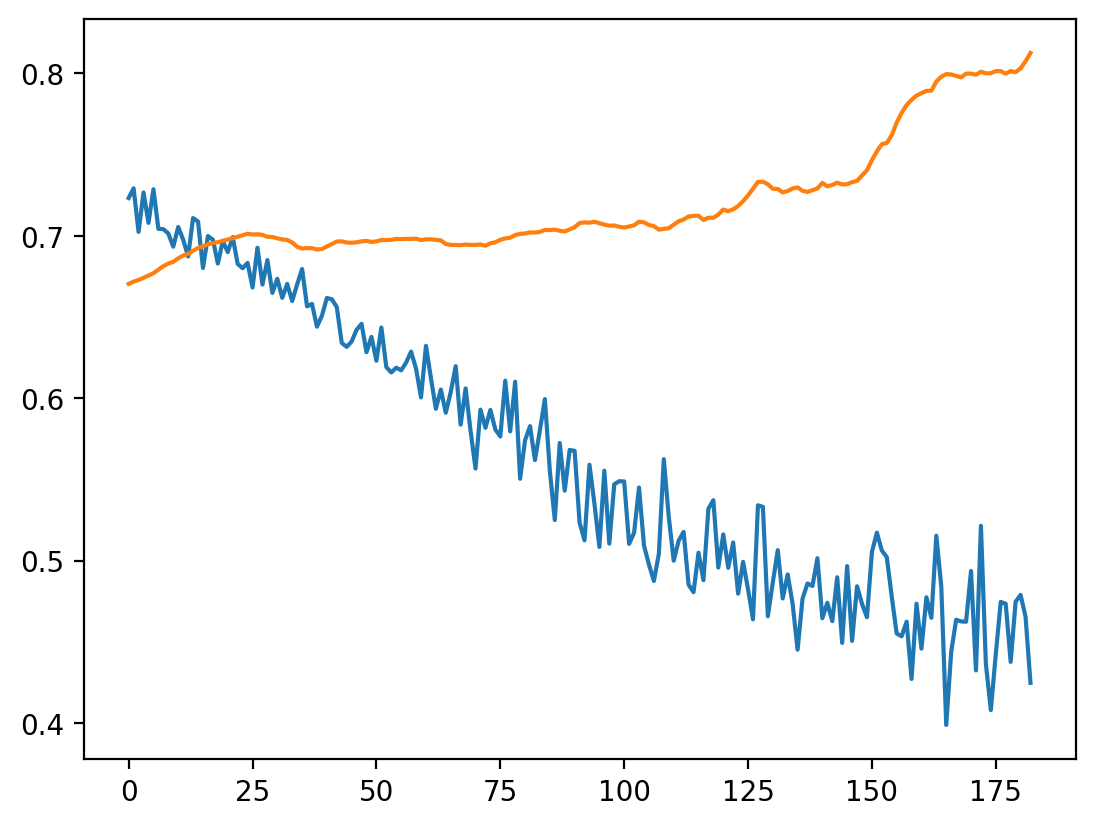

In [18]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

### Plotting Decision Regions

In [19]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 9s 918us/step


<AxesSubplot: >

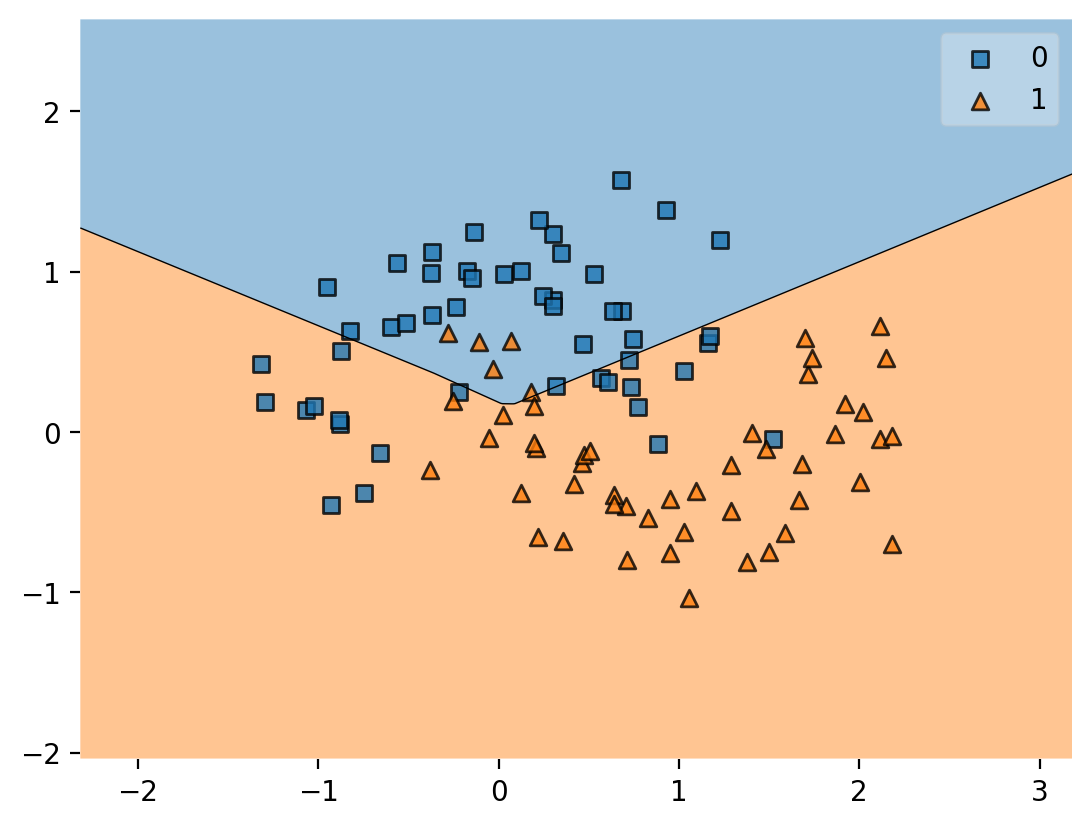

In [20]:
plot_decision_regions(ushape_df[[0,1]].values, ushape_df[2].values.astype(int), clf = model)

## 2nd Round

In [21]:
model = Sequential()
model.add(Dense(3,activation = 'relu',kernel_initializer = 'he_normal',input_dim = 2)) # No.of Neurons

model.add(Dense(2,activation = 'relu',kernel_initializer= 'he_normal'))

model.add(Dense(1,activation = 'sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 2)                 8         
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


### Model Compilation and Training 

In [23]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(X_trainf,y_train,batch_size=10,epochs=99,validation_split=0.2)

Epoch 1/99


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


7/7 [==============================] - 1s 23ms/step - loss: 0.6402 - accuracy: 0.6094 - val_loss: 0.6620 - val_accuracy: 0.2500
Epoch 2/99
7/7 [==============================] - 0s 8ms/step - loss: 0.6347 - accuracy: 0.6094 - val_loss: 0.6612 - val_accuracy: 0.2500
Epoch 3/99
7/7 [==============================] - 0s 4ms/step - loss: 0.6284 - accuracy: 0.6094 - val_loss: 0.6591 - val_accuracy: 0.2500
Epoch 4/99
7/7 [==============================] - 0s 8ms/step - loss: 0.6233 - accuracy: 0.6094 - val_loss: 0.6574 - val_accuracy: 0.2500
Epoch 5/99
7/7 [==============================] - 0s 5ms/step - loss: 0.6169 - accuracy: 0.6094 - val_loss: 0.6557 - val_accuracy: 0.2500
Epoch 6/99
7/7 [==============================] - 0s 8ms/step - loss: 0.6120 - accuracy: 0.6094 - val_loss: 0.6543 - val_accuracy: 0.2500
Epoch 7/99
7/7 [==============================] - 0s 5ms/step - loss: 0.6063 - accuracy: 0.6094 - val_loss: 0.6531 - val_accuracy: 0.2500
Epoch 8/99
7/7 [============================

### Evaluation of Model

In [25]:
y_pred = model.predict(X_testf) 

1/1 [==============================] - 0s 49ms/step


In [26]:
y_capf = np.where(y_pred>0.5,1,0)

In [27]:
accuracy_score(y_test,y_capf)

0.8

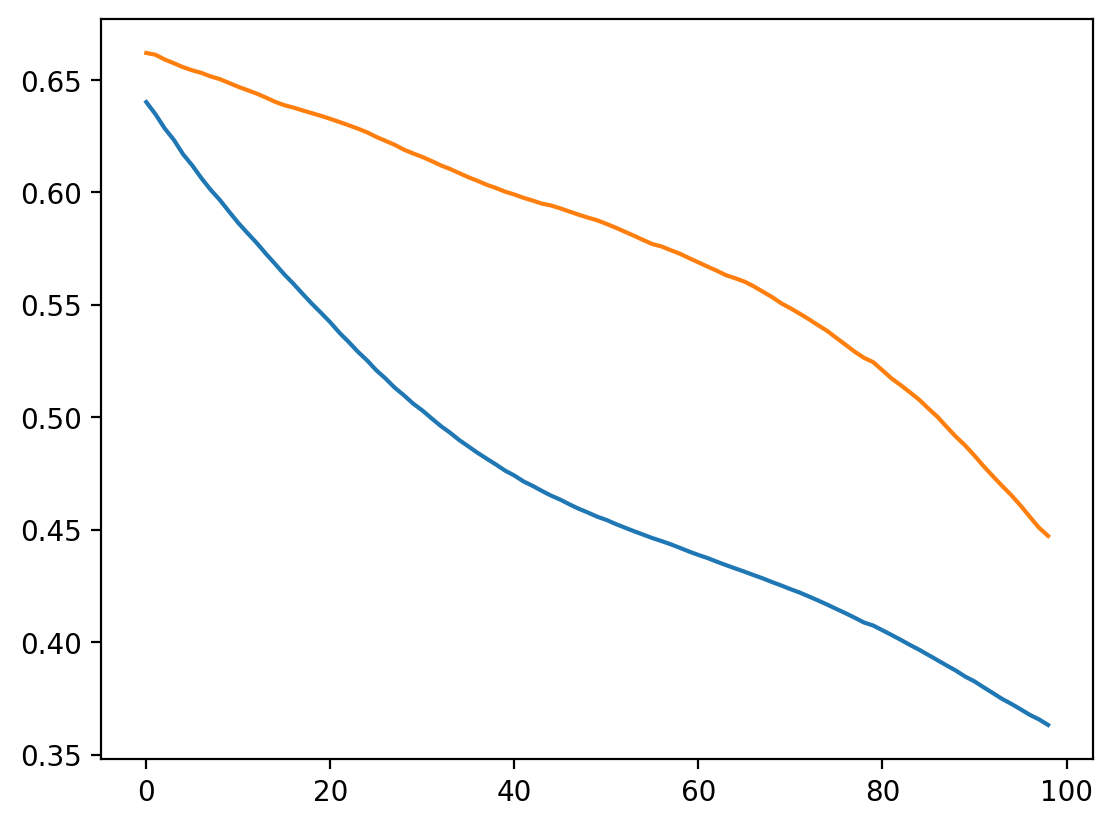

In [28]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

9600/9600 [==============================] - 9s 902us/step


<AxesSubplot: >

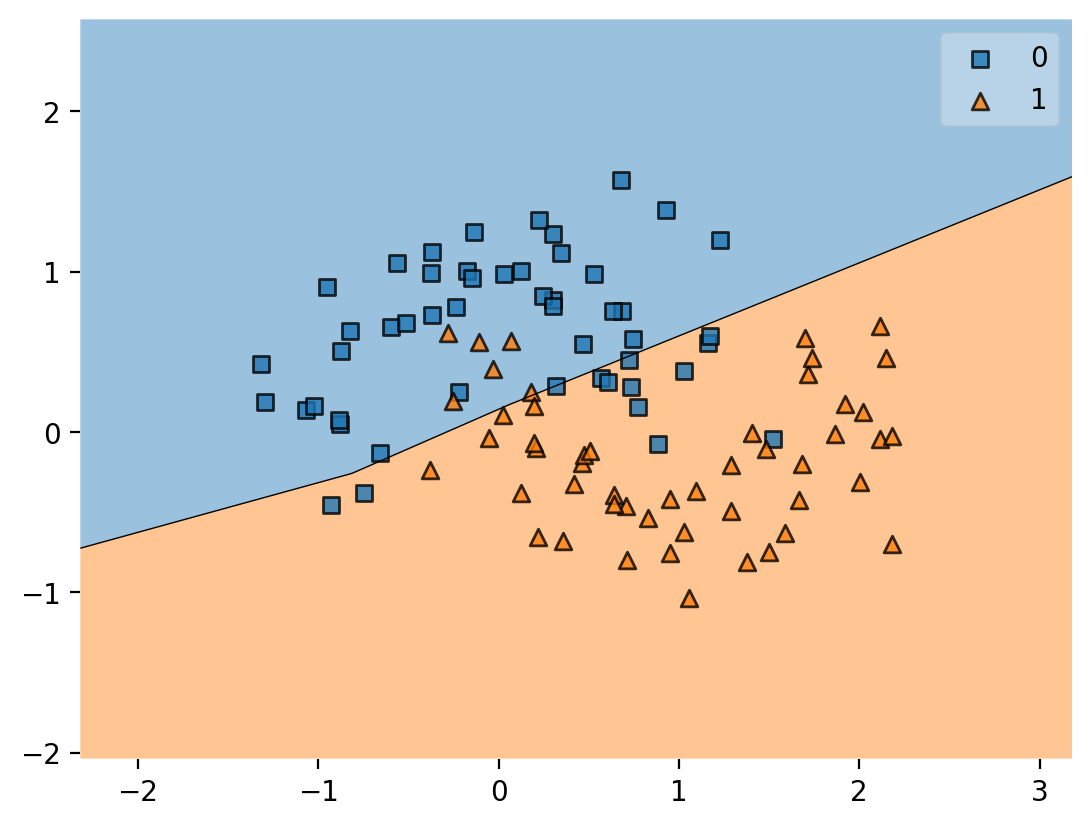

In [29]:
plot_decision_regions(ushape_df[[0,1]].values, ushape_df[2].values.astype(int), clf = model)

## 3rd Round

In [30]:
model = Sequential()
model.add(Dense(8,activation = 'relu',input_dim = 2)) # No.of Neurons
model.add(Dense(5,activation = 'relu'))
model.add(Dense(2,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 24        
                                                                 
 dense_8 (Dense)             (None, 5)                 45        
                                                                 
 dense_9 (Dense)             (None, 2)                 12        
                                                                 
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


### Model Compilation and Training 

In [32]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [33]:
history = model.fit(X_trainf,y_train,batch_size=10,epochs=183,validation_split=0.2)

Epoch 1/183


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


7/7 [==============================] - 1s 27ms/step - loss: 0.6442 - accuracy: 0.6250 - val_loss: 0.6719 - val_accuracy: 0.2500
Epoch 2/183
7/7 [==============================] - 0s 5ms/step - loss: 0.6401 - accuracy: 0.6094 - val_loss: 0.6718 - val_accuracy: 0.2500
Epoch 3/183
7/7 [==============================] - 0s 7ms/step - loss: 0.6359 - accuracy: 0.6094 - val_loss: 0.6710 - val_accuracy: 0.2500
Epoch 4/183
7/7 [==============================] - 0s 6ms/step - loss: 0.6315 - accuracy: 0.6094 - val_loss: 0.6705 - val_accuracy: 0.2500
Epoch 5/183
7/7 [==============================] - 0s 6ms/step - loss: 0.6272 - accuracy: 0.6094 - val_loss: 0.6697 - val_accuracy: 0.2500
Epoch 6/183
7/7 [==============================] - 0s 6ms/step - loss: 0.6225 - accuracy: 0.6094 - val_loss: 0.6692 - val_accuracy: 0.2500
Epoch 7/183
7/7 [==============================] - 0s 6ms/step - loss: 0.6170 - accuracy: 0.6094 - val_loss: 0.6678 - val_accuracy: 0.2500
Epoch 8/183
7/7 [=====================

### Evaluation of Model

In [34]:
y_pred = model.predict(X_testf) 

1/1 [==============================] - 0s 57ms/step


In [35]:
y_capf = np.where(y_pred>0.5,1,0)

In [36]:
accuracy_score(y_test,y_capf)

0.85

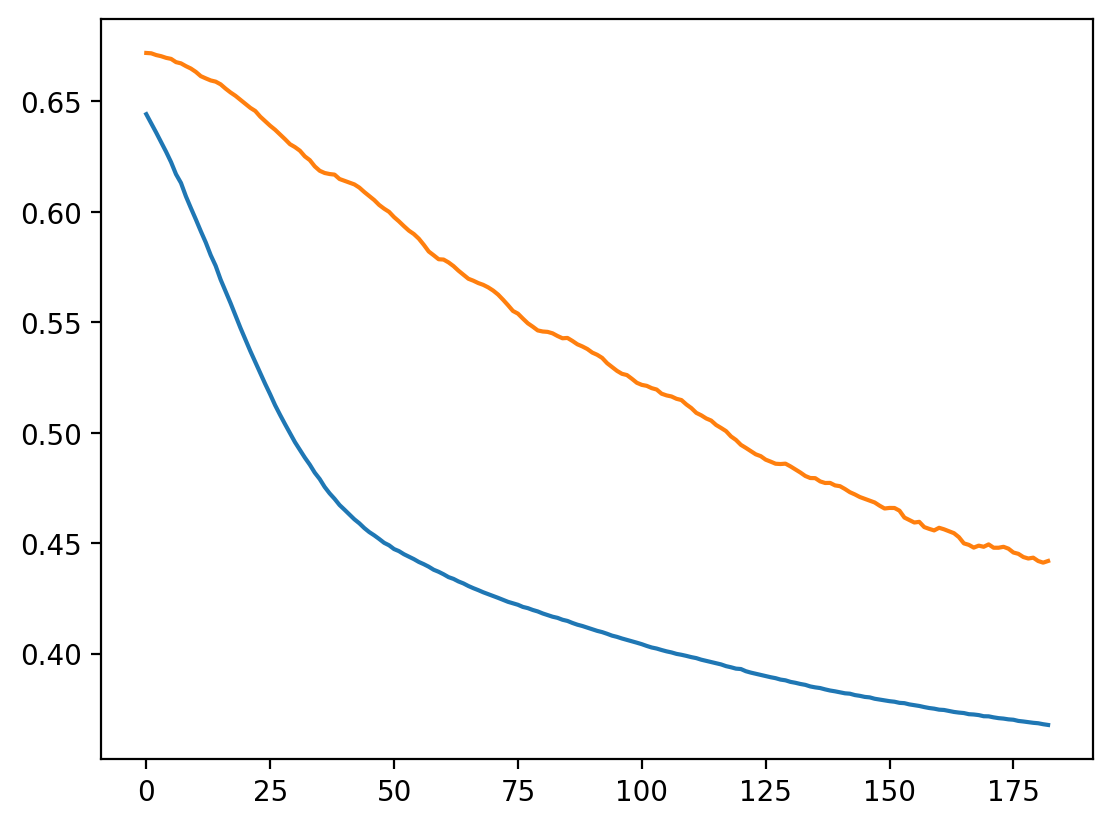

In [37]:
plt.plot(history.history["loss"]);
plt.plot(history.history["val_loss"]);

9600/9600 [==============================] - 9s 971us/step


<AxesSubplot: >

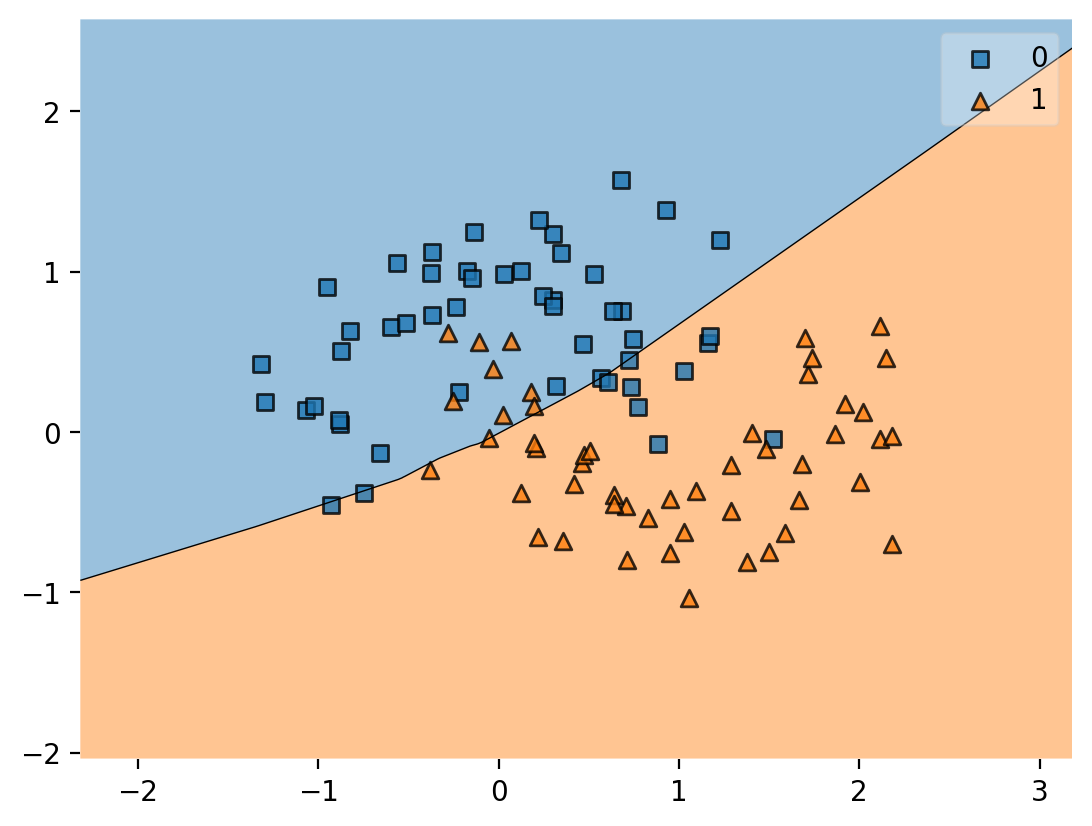

In [38]:
plot_decision_regions(ushape_df[[0,1]].values, ushape_df[2].values.astype(int), clf = model)